## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Targets and Features Variables in my Model
Variable(s) considered the target(s) for my model are:The column "IS_SUCCESSFUL" is the target variable. 

Variable(s) considered the feature(s) for my model are: Other columns expect the ones that were are known as features.


# Step 1: Preprocess the data


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis = 1, inplace = True)


In [3]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace= list(application_counts[application_counts < 500].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts.loc[class_counts > 1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace= list(class_counts[class_counts < 1000].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
application_df.nunique()


APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_with_dummies = pd.get_dummies(application_df)
application_df_with_dummies.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
# Split our preprocessed data into our features and target arrays
X = application_df_with_dummies.drop(['IS_SUCCESSFUL'], axis=1)
y = application_df_with_dummies['IS_SUCCESSFUL']


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
X_train_scaled

array([[ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       ...,
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365]])

In [20]:
X_test_scaled

array([[ 0.01394306, -0.03099144, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       ...,
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03091486, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365]])

In [21]:
number_of_input_features = len(X_train.columns)
number_of_input_features

43

## Step 2 : Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))


# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [35]:
print(len(nn_model.layers))

3


In [25]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [27]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5731 - accuracy: 0.7196
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5549 - accuracy: 0.7284
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5521 - accuracy: 0.7291
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5493 - accuracy: 0.7304
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7309
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7312
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5471 - accuracy: 0.7319
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accura

804/804 [==============================] - 2s 3ms/step - loss: 0.5350 - accuracy: 0.7394
Epoch 82/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5346 - accuracy: 0.7400
Epoch 83/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5349 - accuracy: 0.7395
Epoch 84/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5350 - accuracy: 0.7387
Epoch 85/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5347 - accuracy: 0.7389
Epoch 86/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5346 - accuracy: 0.7392
Epoch 87/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5345 - accuracy: 0.7395
Epoch 88/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5347 - accuracy: 0.7395
Epoch 89/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5342 - accuracy: 0.7401
Epoch 90/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5347 - accuracy: 

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5642 - accuracy: 0.7261 - 931ms/epoch - 3ms/step
Loss: 0.5642006993293762, Accuracy: 0.726064145565033


In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5578 - acc: 0.7263
Loss: 0.557812534073699, Accuracy: 0.7262973785400391


In [29]:
# Attempting to get an accuracy score of 75% or higher by manipulating number of epochs
fit_model1 = nn_model.fit(X_train_scaled,y_train, epochs=75)

Epoch 1/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7399
Epoch 2/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7400
Epoch 3/75
804/804 [==============================] - 1s 910us/step - loss: 0.5337 - accuracy: 0.7400
Epoch 4/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7398
Epoch 5/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7403
Epoch 6/75
804/804 [==============================] - 1s 865us/step - loss: 0.5337 - accuracy: 0.7395
Epoch 7/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7402
Epoch 8/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7402
Epoch 9/75
804/804 [==============================] - 1s 797us/step - loss: 0.5335 - accuracy: 0.7405
Epoch 10/75
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - loss: 0.5734 - accuracy: 0.7287 - 164ms/epoch - 613us/step
Loss: 0.5734156370162964, Accuracy: 0.7287463545799255


<AxesSubplot:>

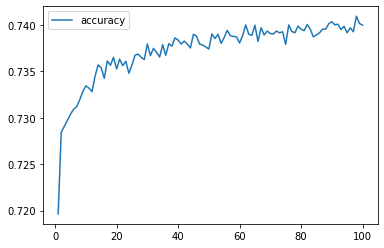

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [33]:
# Export our model to HDF5 file
nn_model.save("AlphabetSoupCharity_Optimization.h5")


## Step 3: Optimize the volume.

Please view the Optimization Jupyter Notebook 'AlphabetSoupCharity_Optimization.ipynb'


## Step 4: Step 4: Write a Report on the Neural Network Model
Overview of the analysis:
The purpose of this analyis is that with the help of deep learning skills (machine learning and neural networks) to predict which applicants will be sucessful if they get funded by the Alphabet Soup Charity.
 


### Data Preprocessing
What variable(s) are considered the target(s) for your model?

Answer: IS_SUCCESSFUL comumn is the our model's target.

What variable(s) are considered to be the features for your model?

Answer: Almost all columns except the ones we dropped. However, NAME, APPLICATION, TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, INCOME_AMT,SPECIAL_CONSIDERATIONS, STATUS, and ASK_AMT are going to be considered as the features of our model.

What variable(s) are neither targets nor features, and should be removed from the input data?

MA Answer: STATUS

###  Compiling, Training, and Evaluating the Model
How many neurons, layers, and activation functions did you select for your neural network model, and why?

In my first model

1.) I choose 111 nuerons, 3 layers and 2 activation functions namely 'relu' and 'sigmoid'.

    I choose 111 neurons because of my input is 43 and 111 happens among the 2/3 value of 43 inputs.
    
    I choose 3 layers including the output layer because hidden layers with units 80 and 30 respectively and 1 output layer.
    
    I choose 2 activation functions because that's the most suitable in optimizing the above model.
    
In my second model,

2.) I choose 111 nuerons, 3 layers and 2 activation functions namely 'relu' and 'sigmoid'.

    I choose 111 neurons because of my input is 43 and 111 happens among the 2/3 value of 43 inputs.
    
    I choose 3 layers including the output layer because hidden layers with units 80 and 30 respectively and 1 output layer.
    
    I choose 2 activation functions because that's the most suitable in optimizing the above model.
    
In my Third Model

3.) I choose 1001 nuerons, 3 layers and 2 activation functions namely 'relu' and 'sigmoid'.

    I choose 111 neurons because of my input is 398 and 1001 happens among the 2/3 value of 398 inputs.
    
    I choose 3 layers including the output layer because hidden layers with units 500 and 500 respectively and 1 output layer.
    
    I choose 2 activation functions because that's the most suitable in optimizing the above model.


Were you able to achieve the target model performance?

Answer : In the first two models, i was not able to achieve target model performance of 75%. 

However Yes in the third model , I was able to achieve the targer model to 79% which is above the 75% project's goal.


What steps did you take to try and increase model performance?

Answer: I did try first to drop extra column but found out the accuracy decreases. So I had to convert the NAME col. into the

data points similar to APPLICATION TYPE & CLASSIFICATION columns.

### Summary:
Answer: When we increase the accuracy of our model to 79% so we should be able  classify each of the points in

our test data more accurately.